In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt 

In [2]:
S = 100
mu = 0.08 
sigma_one = 0.3 
sigma_two = 0.25

N = 1000
T = 1
dt = T / N

rv_one = np.random.normal(0, 1, N)
rv_two = np.random.normal(0, 1, N)

## Dual Volatility Brownian Motion

In [3]:
euler = np.zeros(N)
euler[0] = S

for i in range(1, N):
    
    euler[i] = euler[i - 1] + (mu * euler[i - 1] * dt) + (sigma_one * euler[i - 1] * rv_one[i] * np.sqrt(dt)) + (sigma_two * euler[i - 1] * rv_two[i] * np.sqrt(dt))

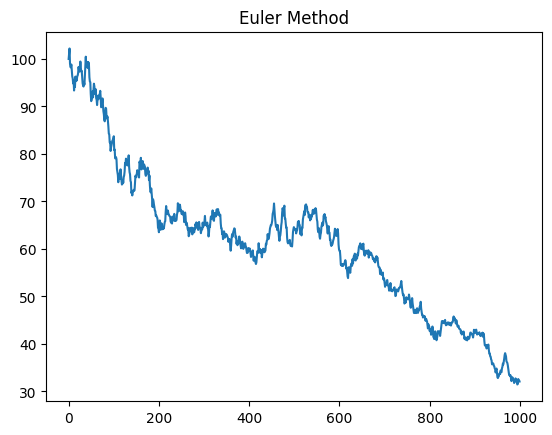

In [4]:
plt.plot(euler)
plt.title("Euler Method")
plt.show()

## Change of Measure Kernel

In [5]:
K = 100
T = 1

## Market Price of Risk 

## $\frac{\mu - r}{\sigma}$

## $\mu - r = \theta_{1} \cdot \sigma_{1} + \theta_{2} \cdot \sigma_{2}$

## $\theta_{2} = \frac{(\mu - r) - (\theta_{1} \cdot \sigma_{1})}{\sigma_{2}}$

## $\theta_{2} = \frac{(0.08 - 0.03) - (0.5 \cdot 0.3)}{0.25} = -0.4$

## Simulate Z

In [6]:
K = 100
T = 1

Z1 = np.zeros(N)
Z2 = np.zeros(N)

r = 0.03
theta1 = 0.5
theta2 = -0.4
rv = np.random.normal(0, 1, N)

In [7]:
for i in range(N):
    
    Z1[i] = np.exp(-0.5 * theta1**2 * T - theta1 * rv[i])
    Z2[i] = np.exp(-0.5 * theta2**2 * T - theta2 * rv[i])
    
Z = Z1 * Z2

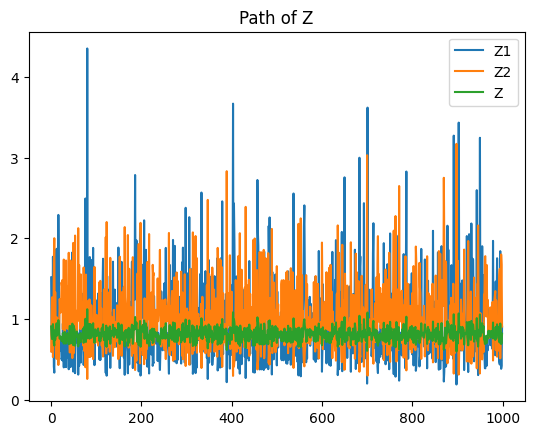

In [8]:
plt.plot(Z1, label = "Z1")
plt.plot(Z2, label = "Z2")
plt.plot(Z, label ="Z")
plt.title("Path of Z")
plt.legend(loc = "best")
plt.show()

## Estimate Expectation of Payoff With Monte Carlo

In [9]:
simulations = np.zeros((1000, 100))
payoff = np.zeros(1000)

for i in range(1000):
    
    temp = np.zeros(100)
    rv = np.random.normal(0, 1, N)
    rv_one = np.random.normal(0, 1, N)
    rv_two = np.random.normal(0, 1, N)    
    temp[0] = 100
    dt = T / 100
    Z1 = np.zeros(100)
    Z2 = np.zeros(100)
    
    for j in range(1, 100):
        
        Z1[j] = np.exp(-0.5 * theta1**2 * T - theta1 * rv[i])
        Z2[j] = np.exp(-0.5 * theta2**2 * T - theta2 * rv[i])
        temp[j] = temp[j - 1] + (mu * temp[j - 1] * dt) + (sigma_one * temp[j - 1] * rv_one[j] * np.sqrt(dt)) + (sigma_two * temp[j - 1] * rv_two[j] * np.sqrt(dt))
        
    simulations[i] = temp
    Z = Z1 * Z2
    payoff[i] = np.exp(-r * T) * np.maximum(temp[-1] - K, 0) * Z[-1]

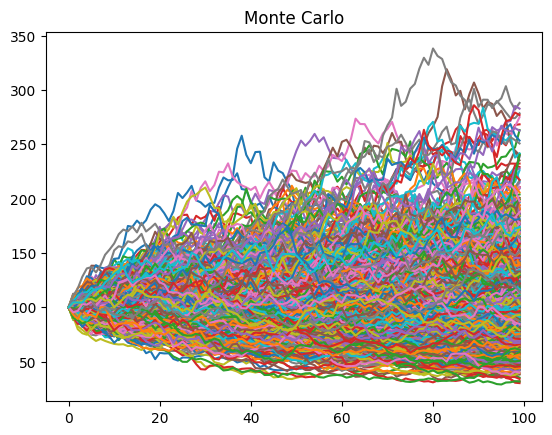

In [10]:
plt.plot(simulations.T)
plt.title("Monte Carlo")
plt.show()

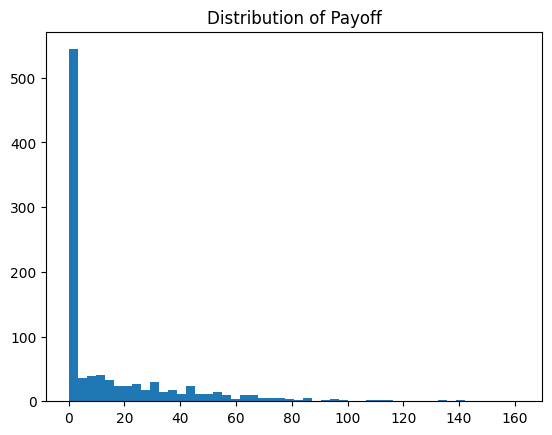

In [11]:
plt.hist(payoff, bins = 50)
plt.title("Distribution of Payoff")
plt.show()

In [12]:
print("Expected Value of Discounted Payoff: ", np.mean(payoff))

Expected Value of Discounted Payoff:  15.79944694633946


## Repeat

## Change $\theta_{1} = 1$

In [13]:
K = 100
T = 1

Z = np.zeros(N)

r = 0.03
theta1 = 1.0
theta2 = -1.0
rv = np.random.normal(0, 1, N)

In [14]:
simulations = np.zeros((1000, 100))
payoff = np.zeros(1000)

for i in range(1000):
    
    temp = np.zeros(100)
    rv = np.random.normal(0, 1, N)
    rv_one = np.random.normal(0, 1, N)
    rv_two = np.random.normal(0, 1, N)    
    temp[0] = 100
    dt = T / 100
    Z1 = np.zeros(100)
    Z2 = np.zeros(100)
    
    for j in range(1, 100):
        
        Z1[j] = np.exp(-0.5 * theta1**2 * T - theta1 * rv[i])
        Z2[j] = np.exp(-0.5 * theta2**2 * T - theta2 * rv[i])
        temp[j] = temp[j - 1] + (mu * temp[j - 1] * dt) + (sigma_one * temp[j - 1] * rv_one[j] * np.sqrt(dt)) + (sigma_two * temp[j - 1] * rv_two[j] * np.sqrt(dt))
        
    simulations[i] = temp
    Z = Z1 * Z2
    payoff[i] = np.exp(-r * T) * np.maximum(temp[-1] - K, 0) * Z[-1]

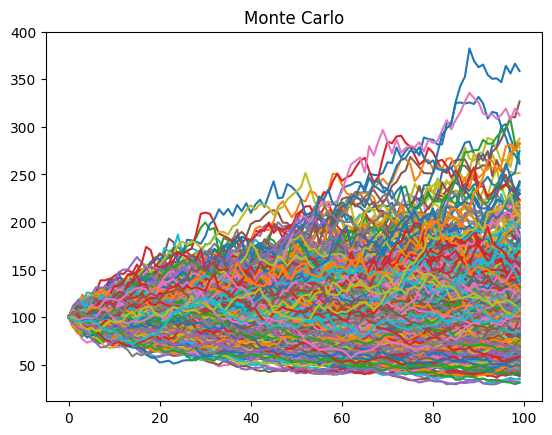

In [15]:
plt.plot(simulations.T)
plt.title("Monte Carlo")
plt.show()

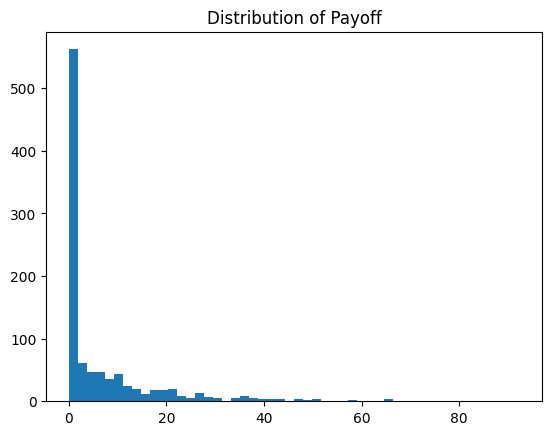

In [16]:
plt.hist(payoff, bins = 50)
plt.title("Distribution of Payoff")
plt.show()

In [17]:
print("Expected Value of Discounted Payoff: ", np.mean(payoff))

Expected Value of Discounted Payoff:  6.828195329153674


## Compute Volatility 

## $\sigma = \sqrt{\sigma_{1}^2 + \sigma_{2}^2}$

In [18]:
scaled_sigma = np.sqrt(sigma_one**2 + sigma_two**2)
print("Scaled Sigma: ", scaled_sigma)

Scaled Sigma:  0.3905124837953327


## Compute Black Scholes Price

In [19]:
def d1(S, K, T, r, sigma):
    
    return (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))

def d2(S, K, T, r, sigma):
    
    return d1(S, K, T, r, sigma) - sigma * np.sqrt(T)

In [20]:
def bs_call(S, K, T, r, sigma):
    
    return S * norm.cdf(d1(S, K, T, r, sigma)) - K * np.exp(-r * T) * norm.cdf(d2(S, K, T, r, sigma))

In [21]:
call = bs_call(100, 100, T, r, scaled_sigma)
print("Black Scholes Price: ", call)

Black Scholes Price:  16.77413614537827


## Compare Answers

#### The price between Black Scholes and the first Monte Carlo simulation match. 

#### The dynamics of the first Z simulation match the dynamics of the Stochastic Differential Equation

## Scaled Brownian Motion

In [22]:
mu_three = 0.07
sigma_three = 0.35

In [23]:
euler = np.zeros(N)
euler[0] = 95

for i in range(1, N):
    
    euler[i] = euler[i - 1] + (mu_three * euler[i - 1] * dt) + (sigma_three * euler[i - 1] * rv_one[i] * np.sqrt(dt))

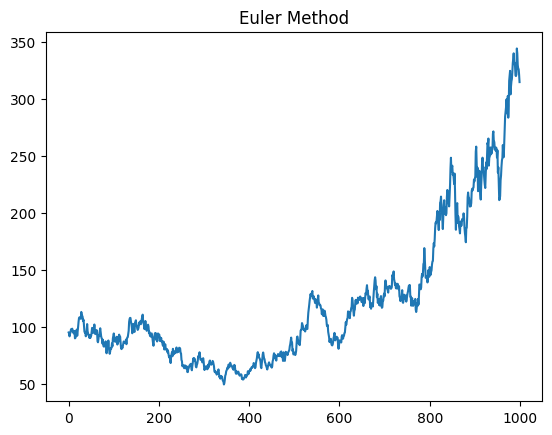

In [24]:
plt.plot(euler)
plt.title("Euler Method")
plt.show()

## Change of Measure Kernel

In [25]:
K = 100
T = 1

Z = np.zeros(N)

r = 0.03
theta1 = 0.5
theta2 = -0.4
rv = np.random.normal(0, 1, N)

In [26]:
simulations = np.zeros((1000, 100))
payoff = np.zeros(1000)

for i in range(1000):
    
    temp = np.zeros(100)
    rv = np.random.normal(0, 1, N)
    rv_one = np.random.normal(0, 1, N)
    rv_two = np.random.normal(0, 1, N)    
    temp[0] = 100
    dt = T / 100
    Z1 = np.zeros(100)
    Z2 = np.zeros(100)
    
    for j in range(1, 100):
        
        Z1[j] = np.exp(-0.5 * theta1**2 * T - theta1 * rv[i])
        Z2[j] = np.exp(-0.5 * theta2**2 * T - theta2 * rv[i])
        temp[j] = temp[j - 1] + (mu * temp[j - 1] * dt) + (sigma_one * temp[j - 1] * rv_one[j] * np.sqrt(dt)) + (sigma_two * temp[j - 1] * rv_two[j] * np.sqrt(dt))
        
    simulations[i] = temp
    Z = Z1 * Z2
    payoff[i] = np.exp(-r * T) * np.maximum(temp[-1] - K, 0) * Z[-1]

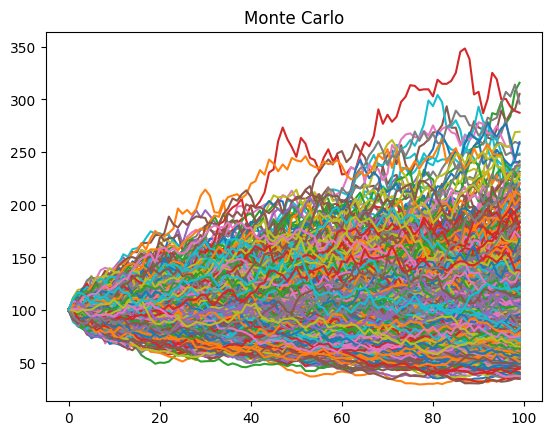

In [27]:
plt.plot(simulations.T)
plt.title("Monte Carlo")
plt.show()

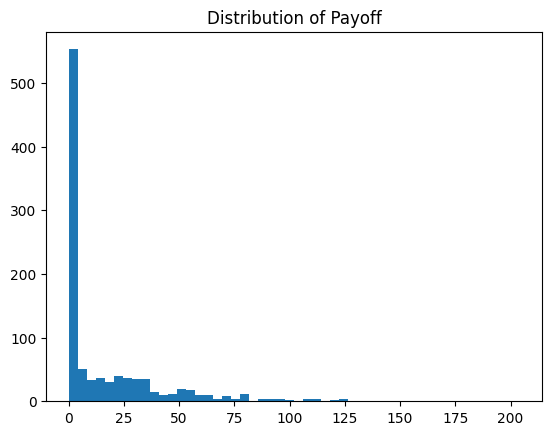

In [28]:
plt.hist(payoff, bins = 50)
plt.title("Distribution of Payoff")
plt.show()

In [29]:
print("Expected Value of Discounted Payoff: ", np.mean(payoff))

Expected Value of Discounted Payoff:  16.222954327360007


In [30]:
K = 100
T = 1

Z = np.zeros(N)

r = 0.03
theta1 = 1.0
theta2 = -1.0
rv = np.random.normal(0, 1, N)

In [31]:
simulations = np.zeros((1000, 100))
payoff = np.zeros(1000)

for i in range(1000):
    
    temp = np.zeros(100)
    rv = np.random.normal(0, 1, N)
    rv_one = np.random.normal(0, 1, N)
    rv_two = np.random.normal(0, 1, N)    
    temp[0] = 100
    dt = T / 100
    Z1 = np.zeros(100)
    Z2 = np.zeros(100)
    
    for j in range(1, 100):
        
        Z1[j] = np.exp(-0.5 * theta1**2 * T - theta1 * rv[i])
        Z2[j] = np.exp(-0.5 * theta2**2 * T - theta2 * rv[i])
        temp[j] = temp[j - 1] + (mu * temp[j - 1] * dt) + (sigma_one * temp[j - 1] * rv_one[j] * np.sqrt(dt)) + (sigma_two * temp[j - 1] * rv_two[j] * np.sqrt(dt))
        
    simulations[i] = temp
    Z = Z1 * Z2
    payoff[i] = np.exp(-r * T) * np.maximum(temp[-1] - K, 0) * Z[-1]

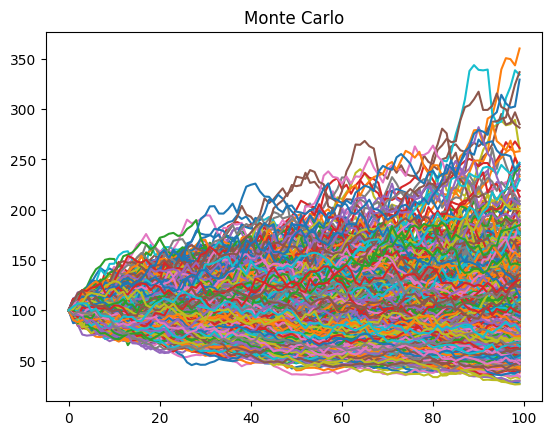

In [32]:
plt.plot(simulations.T)
plt.title("Monte Carlo")
plt.show()

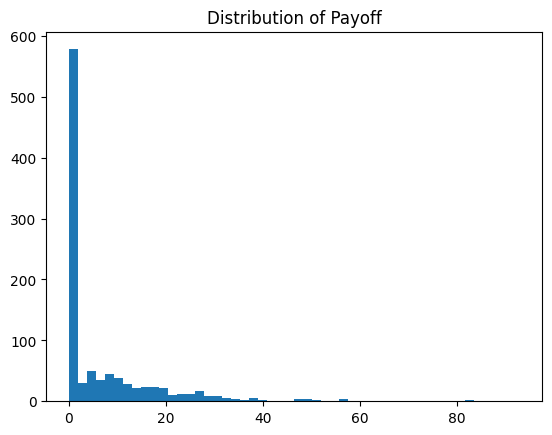

In [33]:
plt.hist(payoff, bins = 50)
plt.title("Distribution of Payoff")
plt.show()

In [34]:
print("Expected Value of Discounted Payoff: ", np.mean(payoff))

Expected Value of Discounted Payoff:  6.806386127595253


## Compare Answers

#### The answers are the same

## Delta Hedging

In [35]:
stock_process = simulations[0]

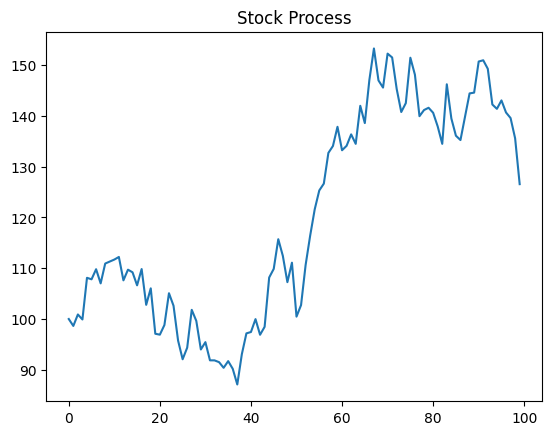

In [36]:
plt.plot(stock_process)
plt.title("Stock Process")
plt.show()

In [37]:
def delta(S, K, T, r, sigma):
    
    return norm.cdf(d1(S, K, T, r, sigma))

In [38]:
deltas = np.zeros(100)
t = np.linspace(1e-5, 1 - 1e-5, 100)

for i in range(100):
    
    deltas[i] = delta(stock_process[i], K, 1 - t[i], r, sigma_three)

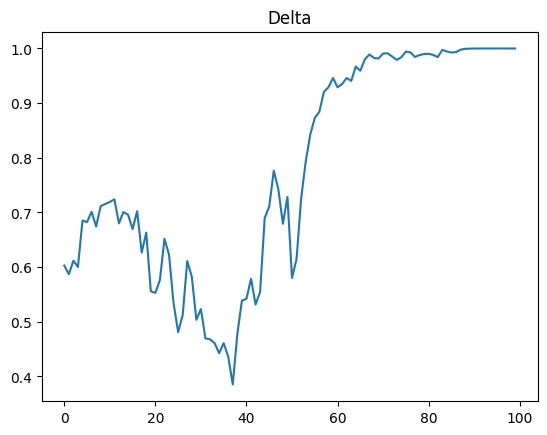

In [39]:
plt.plot(deltas)
plt.title("Delta")
plt.show()

In [40]:
price = np.zeros(100)

for i in range(100):
    
    price[i] = bs_call(stock_process[i], K, 1 - t[i], r, sigma_three)

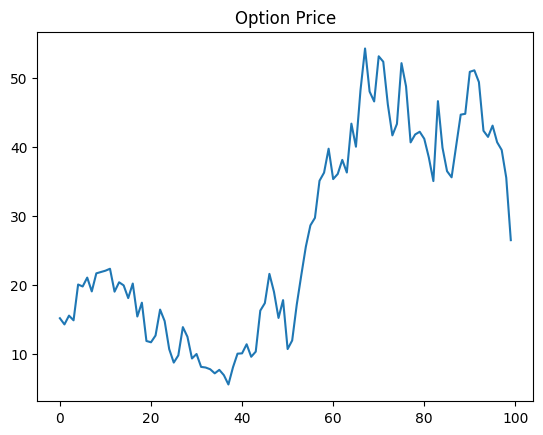

In [41]:
plt.plot(price)
plt.title("Option Price")
plt.show()

In [42]:
pi_process = np.zeros(100)
pi_process[0] = price[0]
print("Initial Price: ", price[0])

Initial Price:  15.214124685926926


In [43]:
y = price[0]

for i in range(1, 100):
    
    pi_process[i] = ((deltas[i] - deltas[i - 1]) * stock_process[i]) + (y * np.exp(-r * dt))
    y = pi_process[i] - ((deltas[i] - deltas[i - 1]) * stock_process[i])

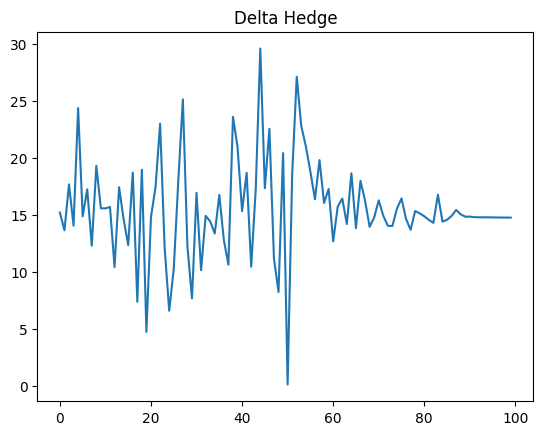

In [44]:
plt.plot(pi_process)
plt.title("Delta Hedge")
plt.show()

In [45]:
print("Delta Hedge: ", pi_process[-1])

Delta Hedge:  14.768909356580421


In [46]:
print("Money Market: ", y)

Money Market:  14.768909356580421


#### The delta hedge worked